In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sma
import statsmodels.formula.api as sfa

In [2]:
# Reading the data
data=pd.read_csv('student-mat.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
# Finding the rows and Columns
print('No of Rows: ', data.shape[0], '\nNo of Columns: ', data.shape[1])

No of Rows:  395 
No of Columns:  33


In [6]:
# Let's have a summary of the data we have and see if we can draw any reference from it
data.describe(include='all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395,395,395.000000,395,395,395,395.000000,395.000000,395,395,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000


In [9]:
# Let's take a look at the categorical and numerical data separately

df_category=data.describe(include='object').T
df_category['Percent']=df_category['freq']/df_category['count'] #Divided the frequency with total count to get clearer insights.
df_category

,count,unique,top,freq,Percent
school,395,2,GP,349,0.883544
sex,395,2,F,208,0.526582
address,395,2,U,307,0.777215
famsize,395,2,GT3,281,0.711392
Pstatus,395,2,T,354,0.896203
Mjob,395,5,other,141,0.356962
Fjob,395,5,other,217,0.549367
reason,395,4,course,145,0.367089
guardian,395,3,mother,273,0.691139
schoolsup,395,2,no,344,0.870886


#### Inference: 

1. Two schools are there, 88% of students belong to GP
2. Male Female Ratio is nearly equal.
3. 78% of Students are from urban areas
4. 71% of students have famsize GT3
5. 89% of students family live together
6. 65% of Students have mother job equal to  any of Teacher, at Home, HealthCare, Civil Services.
7. 46% of Students have Father job equal to  any of Teacher, at Home, HealthCare, Civil Services.
8. 36% students had course as the primary reason for admission
9. 69% of students have guardian as mother.
10. 87% of students do not have any extra additional support.
11. 61% of students have family educational support
12. 46% of students have extra paid classes within the course subject
13. 51% of students have taken part in extracurricular activities
14. 79% of students attended nursery school
15. 95% of students wants to take higher education
16. 83% of students internet access.
17. 34% of students have a romantic relationship

In [22]:
df_number=data.describe().T
df_number

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


##### Inference: 

*As we go through other columns it becomes evident that the columns Medu, Fedu, Traveltime, Studytime, failures, famrel, freetime
goout, dalc, walc, health seem to be categorical in nature. We will verify the same by using the count plot as well.*

However, we can draw from inferences from seemingly numerical columns.

1.  75% of students had less than 8 absences.


2. 75% of students scored less than equal to 13 grade in G1 and G2 while less than equal to 14 in G3.

In [16]:
# Let's segment the columns into numbers and categories for easy operations and try to find if the data in num_cols is
# actually numerical or not.

In [11]:
num_cols=data.describe().columns
num_cols

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [10]:
all_cols=data.describe(include='all').columns
all_cols

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [13]:
cat_cols=data.describe(include='object').columns
cat_cols

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [14]:
len(num_cols)

16

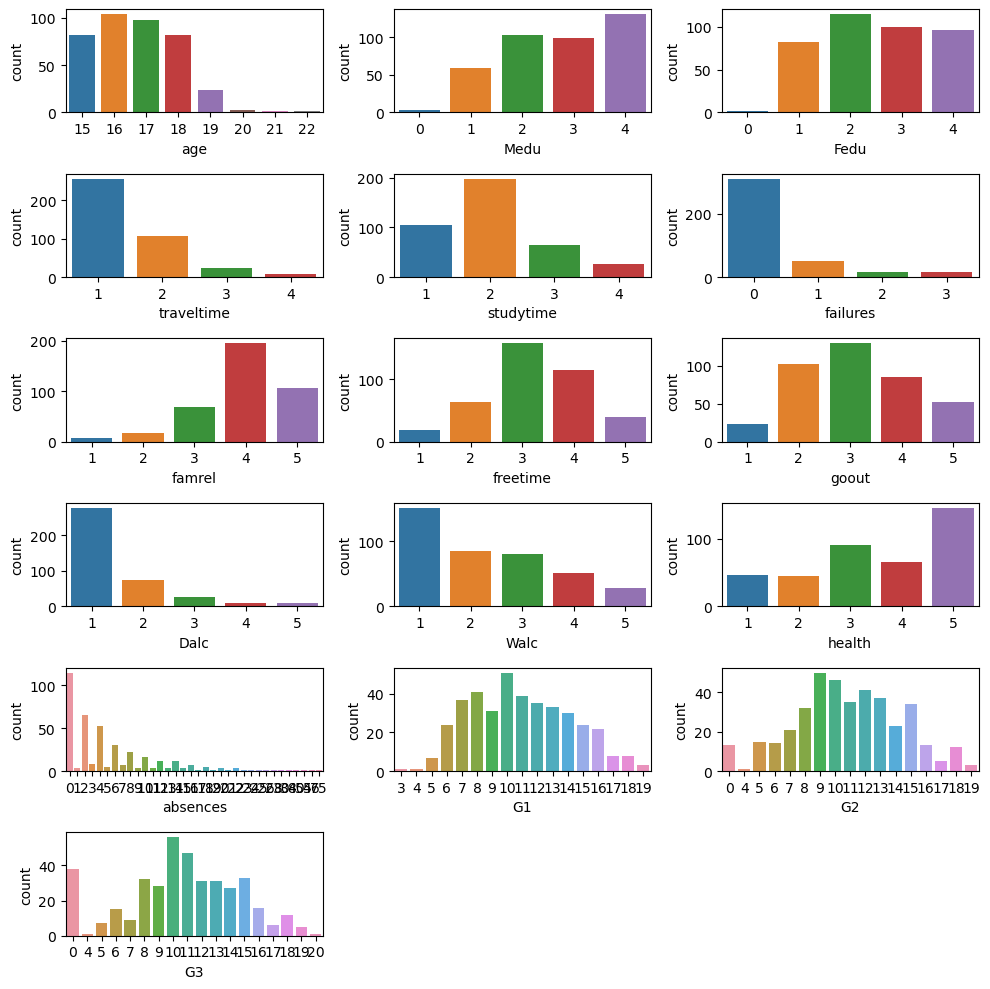

In [19]:
t=1
plt.figure(figsize=(10, 10))
for i in num_cols:
    plt.subplot(6, 3, t)
    sns.countplot(data=data, x=data[i])
    plt.tight_layout()
    t=t+1
    
plt.show()

As shown in the figure, we can say that our previous inference was true about the columns G3, G1, G2, and Absences being numerical and rest of them being categorical.

Inference:

1. Almost all of the students are less than equal to 19 years of age.
2. Majority of the students' mother education greater than equal to 2 and most of them have education levels equal to 4 which signifies mothers are highly educated.
3. Majority of the students' father education is greater than equal to 2, and signifies that overall, fathers are less educated than mothers.
4. 
Let's update the num_cols and cat_cols

In [20]:
cat_cols=data.drop(columns=['absences','G1', 'G2','G3']).columns
cat_cols

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health'],
      dtype='object')

In [21]:
num_cols=['absences','G1', 'G2','G3']
num_cols

['absences', 'G1', 'G2', 'G3']

In [5]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [22]:
num_cols

['absences', 'G1', 'G2', 'G3']

In [24]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

*Inference: No null values present in the data.*

<Axes: >

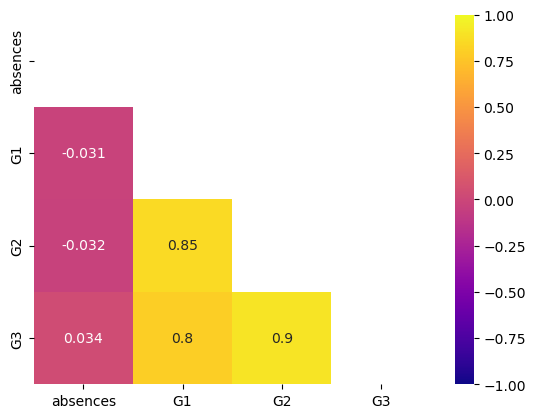

In [23]:
sns.heatmap(data[num_cols].corr(), annot=True, cmap='plasma', vmin=-1, vmax=1, mask=np.triu(data[num_cols].corr()))

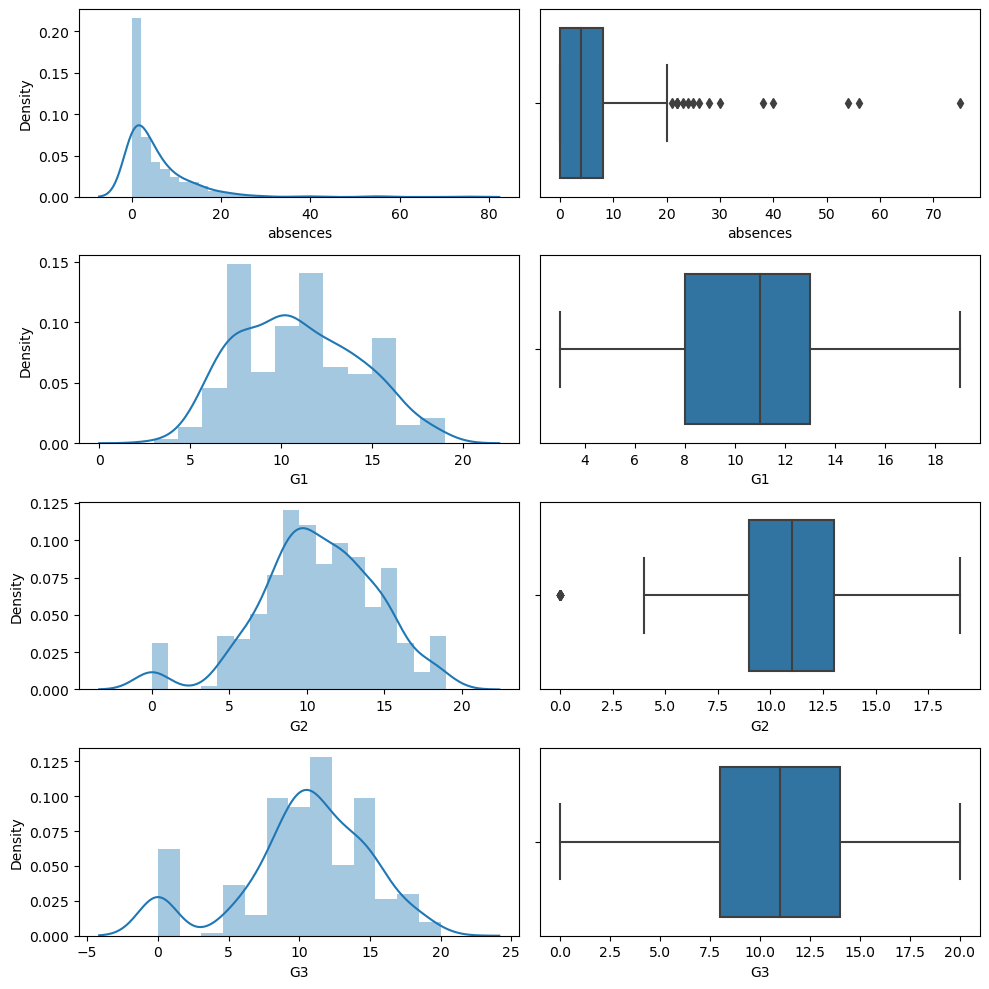

In [56]:
t=1
r=2
plt.figure(figsize=(10, 10))
for i in num_cols:
    plt.subplot(4, 2, t)
    sns.distplot(a=data[i])
    plt.subplot(4, 2, r)
    sns.boxplot(data=data, x=data[i])
    t=t+2
    r=r+2
    plt.tight_layout()
    
plt.show()

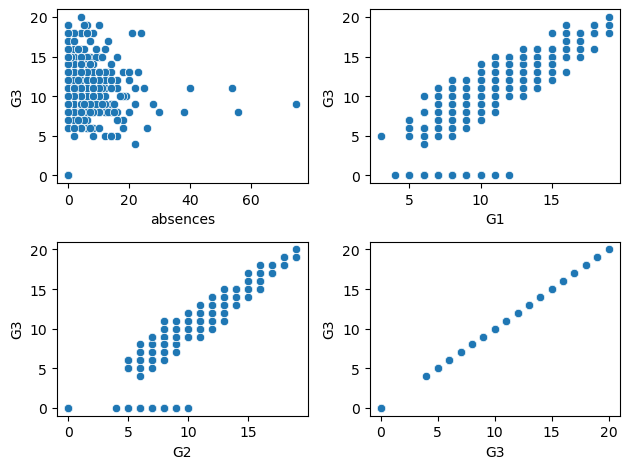

In [58]:
t=1
for i in num_cols:
    plt.subplot(2, 2, t)
    sns.scatterplot(x=data[i], data=data, y=data['G3'])
    plt.tight_layout()
    t=t+1
plt.show()

Inference: 
1. Those students who had absent percentage in the class scored the highest grades.
2. Those students who scored well in G1 and G2, scored well in Final Exam as well.

<Axes: >

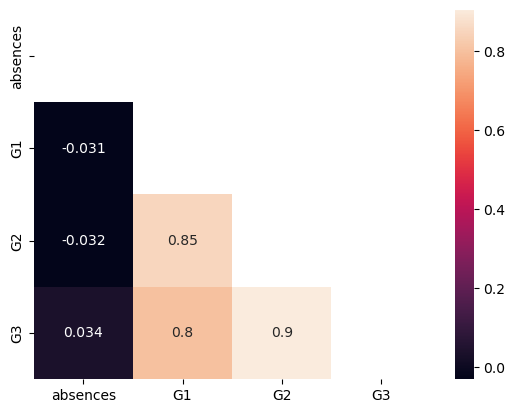

In [30]:
sns.heatmap(data[num_cols].corr(), annot=True, mask=np.triu(data[num_cols].corr()))

In [72]:
len(cat_cols)

29

In [74]:
cat_cols

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health'],
      dtype='object')

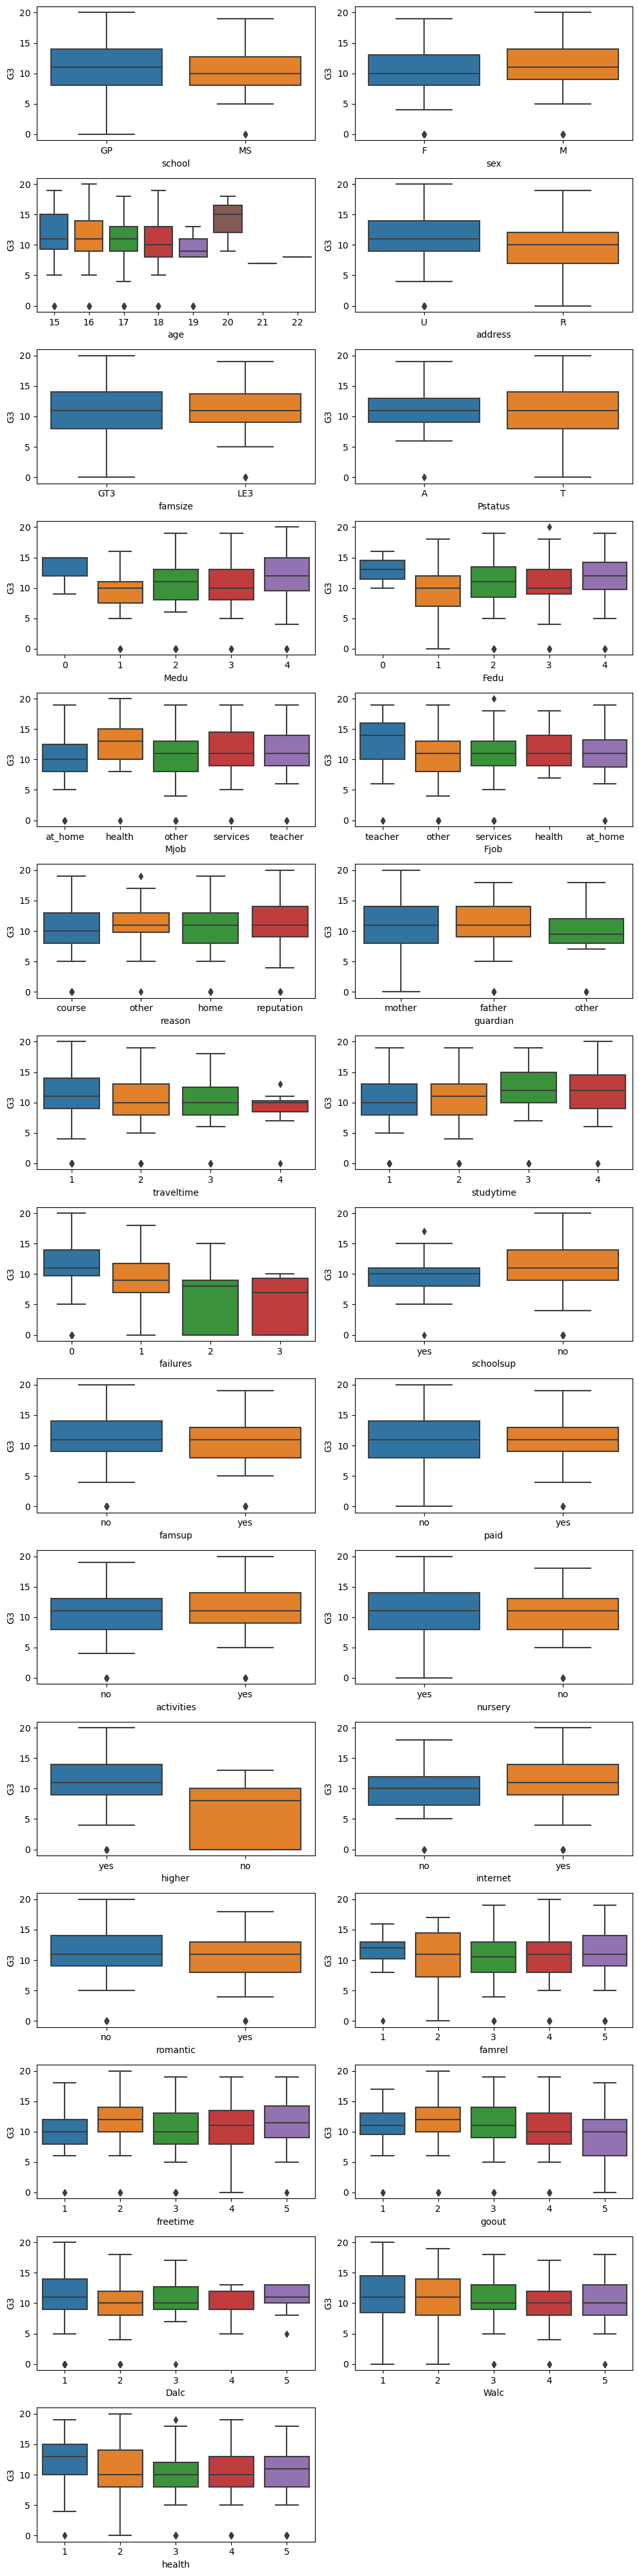

In [83]:
t=1
plt.figure(figsize=(10, 40))
for i in cat_cols:
    plt.subplot(15, 2, t)
    sns.boxplot(data=data, x=data[i], y=data['G3'])
    plt.tight_layout()
    t=t+1

Outlier Treatment

In [85]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [88]:
q1=data['age'].quantile(.25)
q3=data['age'].quantile(.75)
iqr=q3-q1

ul=q3+1.5*iqr
ll=q1-1.5*iqr

In [90]:
data[data['age']>ul]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
247,GP,M,22,U,GT3,T,3,1,services,services,other,mother,1,1,3,no,no,no,no,no,no,yes,yes,5,4,5,5,5,1,16,6,8,8


In [91]:
data[data['age']<ll]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [95]:
data=data[~((data['age']>ul) | (data['age']<ll ))]

In [97]:
data.shape

(394, 33)